## <h2>2<sup>nd</sup> LABORATORY EXERCISE</h2>
<h3>Analysis of Social Structure in Artificial and Real Complex Network Topologies</h3>

## Nanos Georgios 03400144 (DSML)

<p style=text-align:justify>In this exercise we will analyze artificial and real topologies of complex networks based on the metrics used in the previous exercise and some techniques aimed at finding social structure. Specifically, various algorithms for locating communities will be used and compared in graphs derived from real data as well as in the synthetic graphs of the first laboratory exercise.</p>

In [1]:
%matplotlib inline

import matplotlib
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering
import itertools

import warnings
warnings.filterwarnings('ignore')

<h3> Α. Study of real topologies </h3>
<p style = text-align: justify> In this question you will study and gain a sense of the topological structure of real networks. 
More specifically, for the topologies shown in <b> Table 1 </b>, find and show: </p>


<li> The distribution of the node grade and the average grade of each topology. </li>
    <li> The distribution of the node grouping factor and the average grouping factor of each topology. </li>
    <li> Distribution of proximity centrality and mean proximity centrality of each topology. </li>
</ol>
<p style=text-align:justify>Compare the results with those of synthetic topologies. Mark the type of each of the actual topologies based on the types of networks examined in the first laboratory exercise.</p>

<table style=width:100%>
    <caption>Table <b>1</b>: Real topologies</a></caption>
<tr>
    <th style=text-align:left>Topology</th>
    <th style=text-align:left>Data</th>
    <th style=text-align:left>Description</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Game of Thrones - season 5</td>
    <td style=text-align:left><a style=text-decoration:none href='https://networkofthrones.wordpress.com/the-series/season-5/'>GoT</a></td>
    <td style=text-align:left><p style=text-align:justify> The season 5 <b>GoT</b> network represents the interactions between the characters of Game of Thrones in season 5. The season 5 network has 118 nodes (characters) and 394 weighted edges, corresponding to 5,139 interactions. Data can be found here: <a style=text-decoration:none href='https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-edges.csv'>GoT_data</a></p>
</tr> 
<tr>
    <td style=text-align:left>email-Eu-core</td>
    <td style=text-align:left><a style=text-decoration:none href='https://snap.stanford.edu/data/email-Eu-core.html'>email-eu-core</a></td>
    <td style=text-align:left><p style=text-align:justify> The network <b>email-Eu-core</b> was generated using email data from a large European research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core) and the dataset does not contain incoming messages from or outgoing messages to the rest of the world. The dataset also contains "ground-truth" community memberships of the nodes. Each individual belongs to exactly one of 42 departments at the research institute. </p>
</tr> 
    
</table>

<h4> Production of synthetic topologies </h4>
<p> Attention! The networks you generate must be connected. </p>

In [2]:
n=80
d=4
M=300
R=0.25
p=0.3
k=4
seedno=5
random.seed(seedno)

REG = nx.watts_strogatz_graph(n, d, 0)
RGER = nx.gnm_random_graph(n, M)
RGG = nx.random_geometric_graph(n, R)
while nx.is_connected(RGG)==False:
    RGG = nx.random_geometric_graph(n, R)
SF = nx.barabasi_albert_graph(n, d)
SW = nx.watts_strogatz_graph(n,k,p)

REG.graph['pos']= nx.circular_layout(REG)
RGER.graph['pos']= nx.spring_layout(RGER)
RGG.graph['pos'] = nx.get_node_attributes(RGG, 'pos')
SF.graph['pos'] = nx.spring_layout(SF)
SW.graph['pos'] = nx.spring_layout(SW)

<h4>
Introduction and visualization of real topologies.</h4>

In [3]:
#football network
football = nx.read_gml(r"football.gml")

In [4]:
#check if football is directed
print(nx.is_directed(football))

False


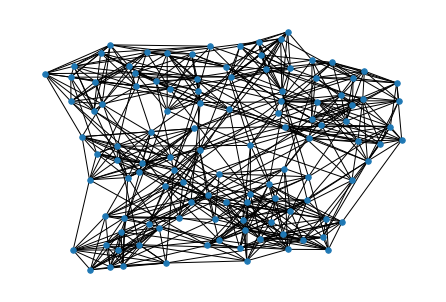

In [5]:
#visualize football
nx.draw(football, node_size=30)
plt.show()

In [6]:
#Game of thrones network
import csv
got=nx.Graph()
with open('got_s5.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_reader)
    for row in csv_reader:
        got.add_edge(row[0],row[1])
        line_count += 1

In [7]:
#check if got is directed
print(nx.is_directed(got))

False


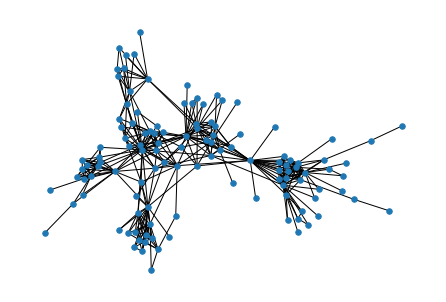

In [8]:
#visualize got
nx.draw(got, node_size=30)
plt.show()

#### Caution! You will study the largest connected component of the email-Eu-core network, after first removing the self-loops. You can use the connected_components, subgraph, remove_edges_from functions of networkx.

In [9]:
#email-Eu-core network
eu = nx.read_edgelist("email-Eu-core.txt",create_using=nx.Graph())

In [10]:
#removing self loops
eu.remove_edges_from(nx.selfloop_edges(eu))

In [11]:
largest_cc = max(nx.connected_components(eu), key=len)

In [12]:
eu_lar = nx.DiGraph(eu.subgraph(largest_cc))

#visualize graph of eu with largest cc component
nx.draw(eu_lar, node_size=30)
plt.show()

<h4>Node degree study for real and synthetic topologies.</h4>

REG


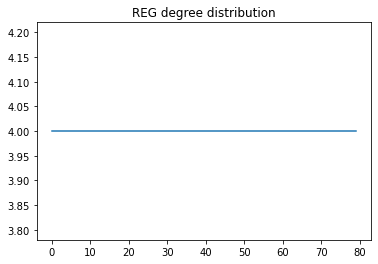

RGER


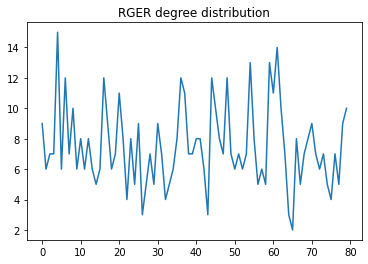

RGG


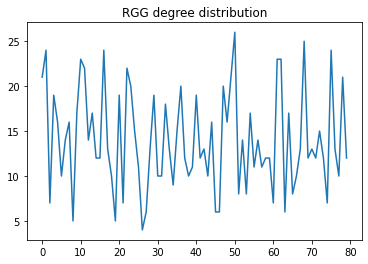

SF


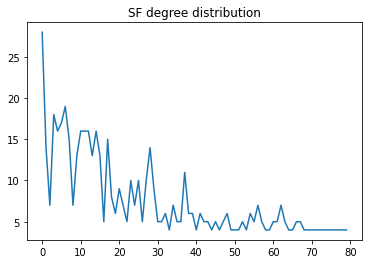

SW


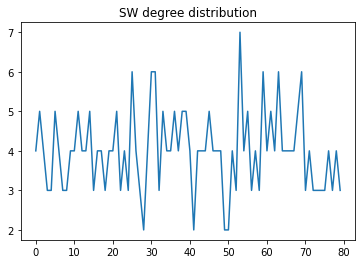

Football


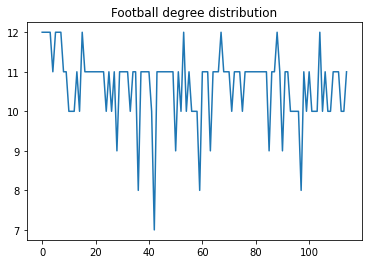

GoT


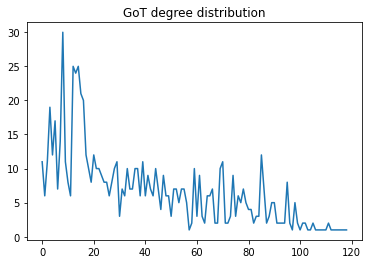

Eu


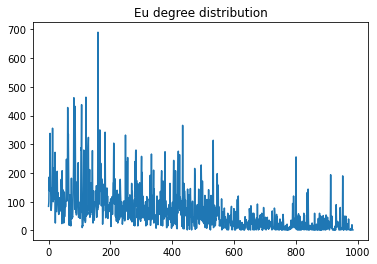

In [13]:
def find_degree(G):
    return np.array([v for (u, v) in nx.degree(G)])


REG_degree = find_degree(REG)
RGER_degree = find_degree(RGER)
RGG_degree = find_degree(RGG)
SF_degree = find_degree(SF)
SW_degree = find_degree(SW)
football_degree = find_degree(football)
got_degree = find_degree(got)
eu_degree = find_degree(eu_lar)

    
REG_degree = find_degree(REG)
print ("REG")
plt.plot(REG_degree)
plt.title('REG degree distribution')
plt.show()

RGER_degree = find_degree(RGER)
print ("RGER")
plt.plot(RGER_degree)
plt.title('RGER degree distribution')
plt.show()

RGG_degree = find_degree(RGG)
print ("RGG")
plt.plot(RGG_degree)
plt.title('RGG degree distribution')
plt.show()

SF_degree = find_degree(SF)
print ("SF")
plt.plot(SF_degree)
plt.title('SF degree distribution')
plt.show()

SW_degree = find_degree(SW)
print ("SW")
plt.plot(SW_degree)
plt.title('SW degree distribution')
plt.show()

football_degree = find_degree(football)
print ("Football")
plt.plot(football_degree)
plt.title('Football degree distribution')
plt.show()

got_degree = find_degree(got)
print ("GoT")
plt.plot(got_degree)
plt.title('GoT degree distribution')
plt.show()

got_degree = find_degree(eu_lar)
print ("Eu")
plt.plot(eu_degree)
plt.title('Eu degree distribution')
plt.show()

In [14]:
print("Mean values \n")
print("REG mean node degree is : ", find_degree(REG).mean())
print()

print("RGER mean node degree is : ", find_degree(RGER).mean())
print()

print("RGG mean node degree is : ", find_degree(RGG).mean())
print()

print("SF mean node degree is : ", find_degree(SF).mean())
print()

print("SW mean node degree is : ", find_degree(SW).mean())
print()

print("Football mean node degree is : ", find_degree(football).mean())
print()

print("GoT mean node degree is : ", find_degree(got).mean())
print()

print("Eu mean node degree is : ", find_degree(eu_lar).mean())

Mean values 

REG mean node degree is :  4.0

RGER mean node degree is :  7.5

RGG mean node degree is :  14.0

SF mean node degree is :  7.6

SW mean node degree is :  4.0

Football mean node degree is :  10.660869565217391

GoT mean node degree is :  6.65546218487395

Eu mean node degree is :  65.1683569979716


<h4>Study of grouping coefficient for real and synthetic topologies</h4>

REG


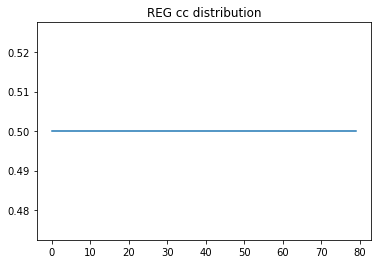

RGER


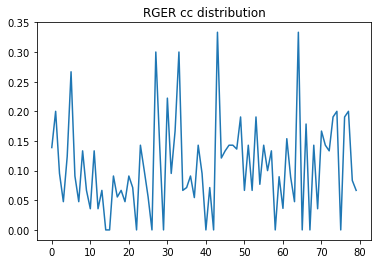

RGG


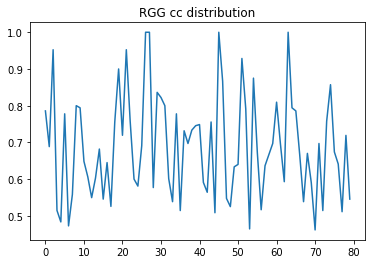

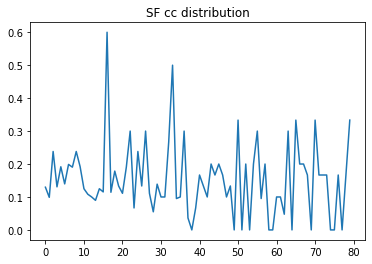

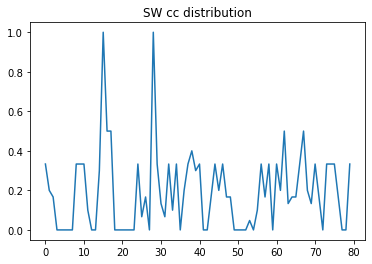

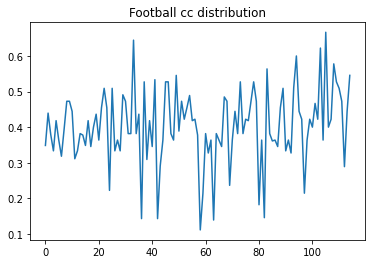

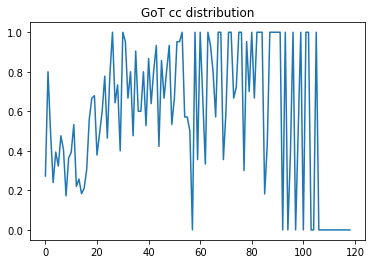

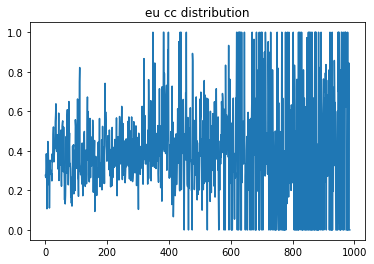

In [15]:
def calculate_clust_coef(G):
    return(nx.clustering(G))


REG_clust_coef = calculate_clust_coef(REG)
RGER_clust_coef = calculate_clust_coef(RGER)
RGG_clust_coef = calculate_clust_coef(RGG)
SF_clust_coef = calculate_clust_coef(SF)
SW_clust_coef = calculate_clust_coef(SW)
football_clust_coef = calculate_clust_coef(football)
got_clust_coef = calculate_clust_coef(got)
eu_clust_coef = calculate_clust_coef(eu_lar)

print ("REG")
plt.plot(list(REG_clust_coef.keys()), list(REG_clust_coef.values()))
plt.title('REG cc distribution')
plt.show()

print ("RGER")
plt.plot(list(RGER_clust_coef.keys()), list(RGER_clust_coef.values()))
plt.title('RGER cc distribution')
plt.show()

print ("RGG")
plt.plot(list(RGG_clust_coef.keys()), list(RGG_clust_coef.values()))
plt.title('RGG cc distribution')
plt.show()

plt.title('SF')
plt.plot(list(SF_clust_coef.keys()), list(SF_clust_coef.values()))
plt.title('SF cc distribution')
plt.show()

plt.title('SW')
plt.plot(list(SW_clust_coef.keys()), list(SW_clust_coef.values()))
plt.title('SW cc distribution')
plt.show()

plt.title('Football')
plt.plot(list(football_clust_coef.values()))
plt.title('Football cc distribution')
plt.show()

plt.title('GoT')
plt.plot(list(got_clust_coef.values()))
plt.title('GoT cc distribution')
plt.show()

plt.title('eu cc distribution')
plt.plot(list(eu_clust_coef.values()))
plt.title('eu cc distribution')
plt.show()

In [16]:
print("Mean values \n")
print("Mean clustering coefficient of REG : ", nx.average_clustering(REG))
print()
print("Mean clustering coefficient of RGER : ", nx.average_clustering(RGER))
print()
print("Mean clustering coefficient of RGG : ", nx.average_clustering(RGG))
print()
print("Mean clustering coefficient of SF : ", nx.average_clustering(SF))
print()
print("Mean clustering coefficient of SW : ", nx.average_clustering(SW))
print()
print("Mean clustering coefficient of Football : ", nx.average_clustering(RGG))
print()
print("Mean clustering coefficient of GoT : ", nx.average_clustering(SF))
print()
print("Mean clustering coefficient of eu : ", nx.average_clustering(SW))

Mean values 

Mean clustering coefficient of REG :  0.5

Mean clustering coefficient of RGER :  0.10780871905871907

Mean clustering coefficient of RGG :  0.6889130939729271

Mean clustering coefficient of SF :  0.15363123521501998

Mean clustering coefficient of SW :  0.19434523809523807

Mean clustering coefficient of Football :  0.6889130939729271

Mean clustering coefficient of GoT :  0.15363123521501998

Mean clustering coefficient of eu :  0.19434523809523807


<h4>
Proximity centrality study for real and synthetic topologies</h4>

REG


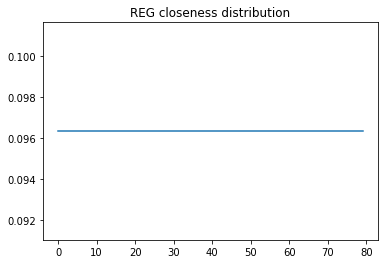

RGER


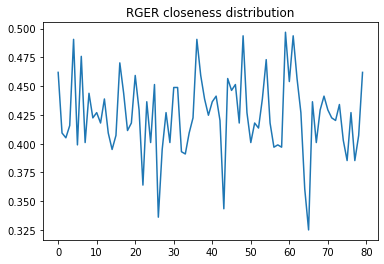

RGG


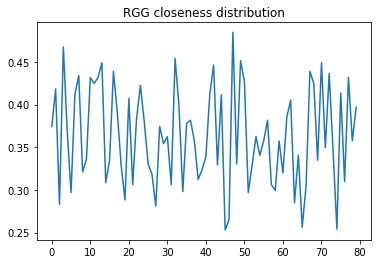

SF


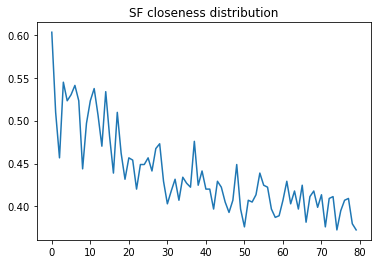

SW


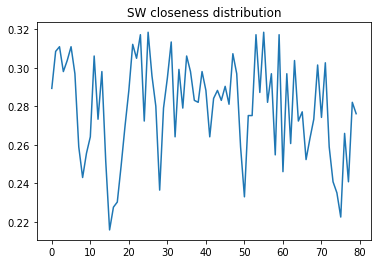

Football


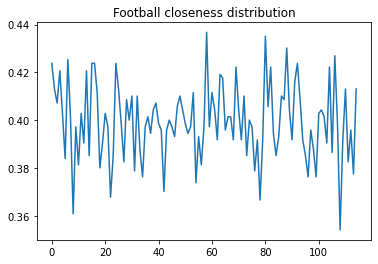

GoT


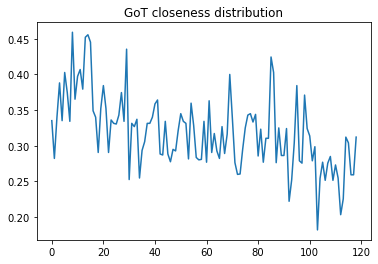

eu


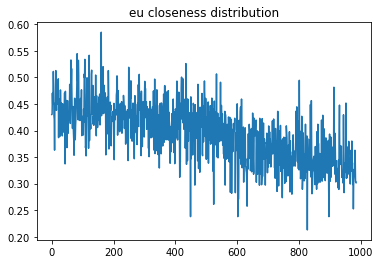

In [17]:
def find_closeness(G):
    return(nx.closeness_centrality(G))


REG_closeness = find_closeness(REG)
RGER_closeness = find_closeness(RGER)
RGG_closeness = find_closeness(RGG)
SF_closeness = find_closeness(SF)
SW_closeness = find_closeness(SW)
football_closeness = find_closeness(football)
got_closeness = find_closeness(got)
eu_closeness = find_closeness(eu_lar)

print ("REG")
plt.plot(list(REG_closeness.keys()), list(REG_closeness.values()))
plt.title('REG closeness distribution')
plt.show()

print ("RGER")
plt.plot(list(RGER_closeness.keys()), list(RGER_closeness.values()))
plt.title('RGER closeness distribution')
plt.show()

print ("RGG")
plt.plot(list(RGG_closeness.keys()), list(RGG_closeness.values()))
plt.title('RGG closeness distribution')
plt.show()

print ("SF")
plt.plot(list(SF_closeness.keys()), list(SF_closeness.values()))
plt.title('SF closeness distribution')
plt.show()

print ("SW")
plt.plot(list(SW_closeness.keys()), list(SW_closeness.values()))
plt.title('SW closeness distribution')
plt.show()

print ("Football")
plt.plot(list(football_closeness.values()))
plt.title('Football closeness distribution')
plt.show()

print ("GoT")
plt.plot(list(got_closeness.values()))
plt.title('GoT closeness distribution')
plt.show()

print ("eu")
plt.plot(list(eu_closeness.values()))
plt.title('eu closeness distribution')
plt.show()

In [18]:
print("Mean values \n")

print("Mean closeness of REG : ", np.array(list(REG_closeness.values())).mean())
print()
print("Mean closeness of RGER : ", np.array(list(RGER_closeness.values())).mean())
print()
print("Mean closeness of RGG : ", np.array(list(RGG_closeness.values())).mean())
print()
print("Mean closeness of SF : ", np.array(list(SF_closeness.values())).mean())
print()
print("Mean closeness of SW : ", np.array(list(SW_closeness.values())).mean())
print()
print("Mean closeness of Football : ", np.array(list(football_closeness.values())).mean())
print()
print("Mean closeness of eu : ", np.array(list(eu_closeness.values())).mean())

Mean values 

Mean closeness of REG :  0.09634146341463413

Mean closeness of RGER :  0.42475897842852933

Mean closeness of RGG :  0.36365115947647253

Mean closeness of SF :  0.4386021576757619

Mean closeness of SW :  0.2791959454639716

Mean closeness of Football :  0.39931907825186225

Mean closeness of eu :  0.39446404120869627


<h3>B. Familiarity with community identification tools</h3>
<ol>
<li>Using the <b> Table 2 </b> functions for each <u> real </u> (<b> Table 1 </b>) and <u> synthetic </u> (from the <b> exercise 1 </b>) network:</p>
<ol>
    <li>visualize the communities resulting from each method,</li>
    <li>
make the necessary annotations (eg: comparison of the number of communities calculated by each algorithm).</li>
</ol>
<p>For visualization, highlight each community differently, e.g. with a different color.</p>
<p style=text-align:justify>In the case of synthetic networks, make comparisons between the different types of topologies. For example, in the case of random geometry, there is intuitively a community around each node that is created based on the distances of the latter from the other nodes in the network. In the case of scale-free networks, it is possible to form communities around the nodes to a large extent.</p>
<li>For each community tracking algorithm and for each topology evaluate the quality of the partition with the metrics performance and modularity(<a style=text-decoration:none href='https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.quality'>measuring_partitions</a>). For metric performance, you will use the partition_quality function of networkx.</li>
<li>For the larger connected component of email-Eu-core, compare the ground-truth partition given in the Email-Eu-core-department-labels.txt file with the partitions resulting from the methods examined in terms of the number of communities produced and in terms of performance and modularity metrics. </li>
<li>
You can use the library to track the execution time of your implementation <a style=text-decoration:none href='https://tqdm.github.io/'>tqdm</a>. 
In your commentary take into account the trade-off of the quality of the partition and the execution time of the examined algorithms. </li>
</ol>

<table style=float:left;width:70%>
    <caption>Table <b>2</b>: Community locating functions</caption>
    <tr>
        <th style=text-align:left> Method of locating communities</th>
        <th style=text-align:left>Function</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Before applying community-based functions, carefully study the input they require and the output format they generate.</b></p>

In [19]:
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

nfootball,football_map=conv2int(football, 0)
ngot, got_map=conv2int(got, 0)
neu, eu_map=conv2int(eu_lar, 0)

<h4>
Set colors to visualize communities.</h4>

In [20]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

<h4> Locating communities in synthetic and real networks using the Newman-Girvan method. </h4>
<p> Produce partitions resulting from the Newman-Girvan method by removing a maximum of 50 edges. </p>
<p> Select the partitions with the 1) highest modularity score and 2) performance score for each real and synthetic network. </p>

In [21]:
def GN(G,k):
    
    max_modularity = 0
    max_performance = 0
    
    communities=[]
    #pick the communities by taking consideration the given k value
    clustering = nx.algorithms.community.centrality.girvan_newman(G)
    limited = itertools.takewhile(lambda c: len(c) <= k, clustering)

    for community in limited:
        #checking modularity quality
        community_modularity = nx.algorithms.community.quality.modularity(G, community)
        #checking perofmance score
        performance_score = nx.algorithms.community.quality.performance(G, community)

        if (community_modularity > max_modularity):
            result_quality = tuple(community)
            max_modularity = community_modularity
            
        if (performance_score > max_performance):
            result_performance = tuple(community)
            max_performance = performance_score
            
    return(result_quality, result_performance, max_modularity, max_performance)

<h4> Identify communities in synthetic and real networks using the Spectral Clustering method. </h4>
Caution! To select the value of the parameter concerning the dimension of the projection subspace (n_clusters) of the SpectralClustering function, you must consider the size | V | of each network.
<p> Examine the resulting partitions for n_clusters $ = 2, ..., | V | $. Select for visualization the partitions with 1) higher modularity score and 2) performance score for each real and synthetic network. </p>

In [22]:
def SP(G,k):
    result_modularity = ()
    result_performance = ()
    max_modularity = 0
    max_performance = 0
    
    #pick the communities by taking consideration the given k value
    for i in range(1, k + 1):
        #Because G is a graph we convert it and use its adjacency matrix
        G_adj = nx.to_numpy_matrix(G)
        sc = SpectralClustering(n_clusters=i, affinity='precomputed').fit_predict(G_adj) # n_init is 10 by default
        
        # We have to manually create the partition from the 'labels' array
        part_array = [[] for x in range(i)]
        result = []
        for node, label in zip(G, sc):
            part_array[label].append(node)
            
        for j in range(len(part_array)):
            result.append(set(part_array[j]))

        #checking modularity quality
        community_modularity = nx.algorithms.community.quality.modularity(G, result)
        #checking perofmance score
        performance_score = nx.algorithms.community.quality.performance(G, result)
        
        if (community_modularity > max_modularity):
            result_modularity = tuple(result)
            max_modularity = community_modularity
            
        if (performance_score > max_performance):
            result_performance = tuple(result)
            max_performance = performance_score
            
    return(result_modularity, result_performance, max_modularity, max_performance)

<h4> Identify communities in synthetic and real networks using the Modularity Maximization method. 
</h4>For the partition that will occur in each synthetic and real network, calculate the modularity score and the performance score.

In [23]:
def MM(G):
    return(tuple(nx.algorithms.community.modularity_max.greedy_modularity_communities(G)), nx.algorithms.community.quality.modularity(G, tuple(nx.algorithms.community.modularity_max.greedy_modularity_communities(G))))

In [24]:
G1 = football
G2 = got
G3 = eu_lar

In [25]:
def init_visual(G):
    GN_vis(G)
    SP_vis(G)
    MM_vis(G)

def GN_vis(G):
    part_mod, part_perf, max_mod, max_perf = GN(G, 50)
    if G in [G1, G2, G3]:
        pos = nx.spring_layout(G)
    else:
        pos = G.graph['pos']
       

    fig1 = plt.figure(figsize=(10, 5))
    fig1.suptitle("Communities from Newman-Girvan method and partition with modularity score : {} ".format(max_mod))
    ax = plt.gca()
    
    for partition, color in zip(part_mod, colors):
        nx.draw_networkx_nodes(G, pos, nodelist=partition, node_size=40, node_color=color, edgecolors='black', ax=ax)
    nx.draw_networkx_edges(G, pos,  ax=ax, edge_color='gray')
    plt.show()
    
    
    fig2 = plt.figure(figsize=(10, 5))
    fig2.suptitle("Communities from Newman-Girvan method and paritition with performance score : {} ".format(max_perf))
    ax = plt.gca()
    
    for partition, color in zip(part_perf, colors):
        nx.draw_networkx_nodes(G, pos, nodelist=partition, node_size=40, node_color=color, edgecolors='black', ax=ax)
    nx.draw_networkx_edges(G, pos,  ax=ax, edge_color='gray')
    plt.show()
    

def SP_vis(G):
    
    part_mod, part_perf, max_mod, max_perf = SP(G, 50)
    if G in [G1, G2, G3]:
        pos = nx.spring_layout(G)
    else:
        pos = G.graph['pos']
        
    fig1 = plt.figure(figsize=(10, 5))
    fig1.suptitle("Communities from Spectral Clustering method and partition with modularity score : {} ".format(max_mod))
    ax = plt.gca()
    
    for partition, color in zip(part_mod, colors):
        nx.draw_networkx_nodes(G, pos, nodelist=partition, node_size=40, node_color=color, edgecolors='black', ax=ax)
    nx.draw_networkx_edges(G, pos,  ax=ax, edge_color='gray')
    plt.show()
    
    
    fig2 = plt.figure(figsize=(10, 5))
    fig2.suptitle("Communities from Spectral Clustering method and paritition with performance score : {} ".format(max_perf))
    ax = plt.gca()
    
    for partition, color in zip(part_perf, colors):
        nx.draw_networkx_nodes(G, pos, nodelist=partition, node_size=40, node_color=color, edgecolors='black', ax=ax)
    nx.draw_networkx_edges(G, pos,  ax=ax, edge_color='gray')
    plt.show()
    

def MM_vis(G):
    partitioning, max_mod = MM(G)

    if G in [G1, G2, G3]:
        pos = nx.spring_layout(G)
    else:
        pos = G.graph['pos']
    fig = plt.figure(figsize=(10, 5))
    fig.suptitle("Communities from Modularity Maximization with modularity score : {} ".format(max_mod))
    ax = plt.gca()
    for partition, color in zip(partitioning, colors):
        nx.draw_networkx_nodes(G, pos, nodelist=partition, node_size=40, node_color=color, edgecolors='black', ax=ax)
    nx.draw_networkx_edges(G, pos,  ax=ax, edge_color='gray')
    plt.show()
    

#### Visualization of American College Football communities

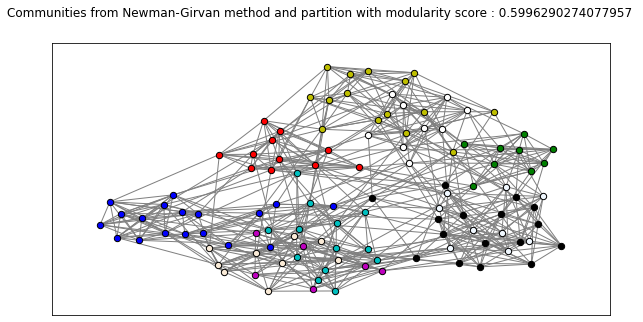

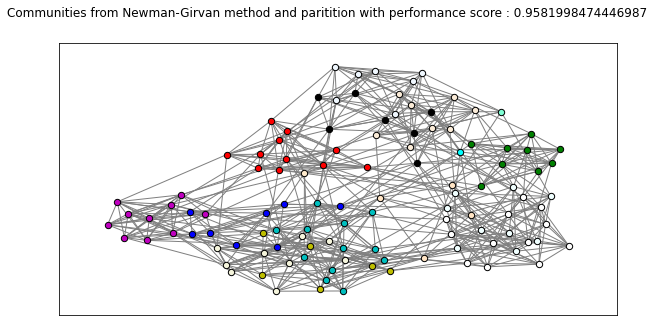

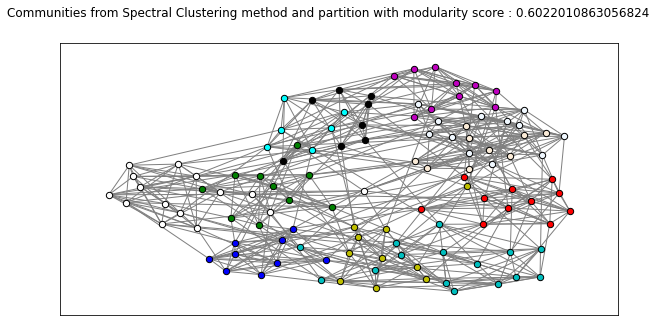

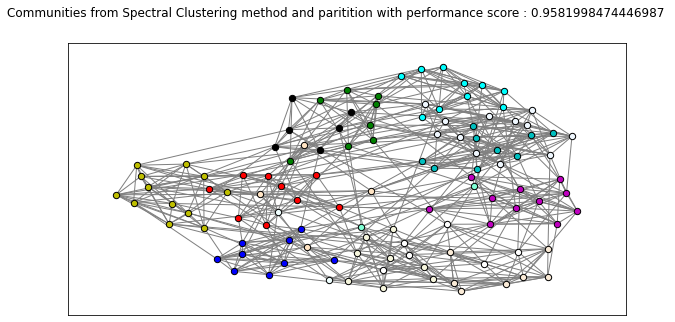

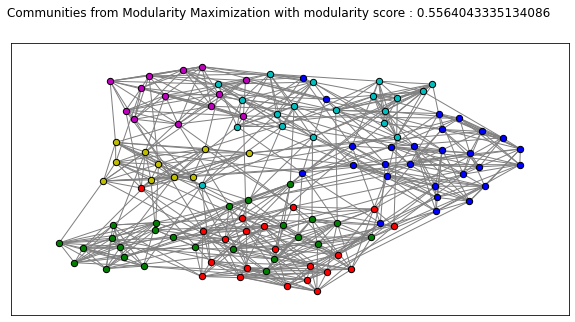

In [26]:
init_visual(football)

The different sports categories in which the teams play are obvious, as each team belongs to the respective community / category. We notice that the performance gives relatively good performance. It is worth noting that these performances are very close to each other, with the first and second methods being almost identical. Visually we can say that in all three methods the communities are relatively easily distinguishable.

#### Visualization of Game of Thrones communities

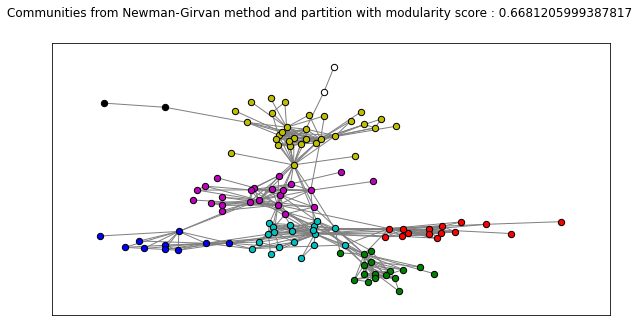

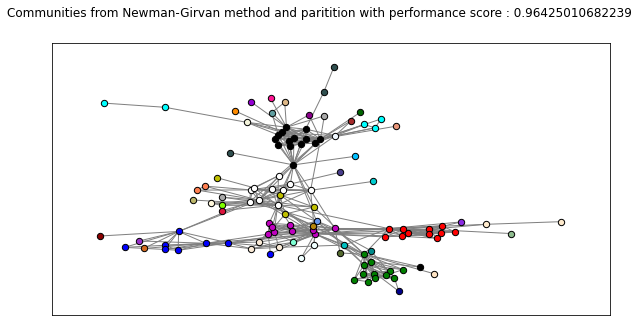

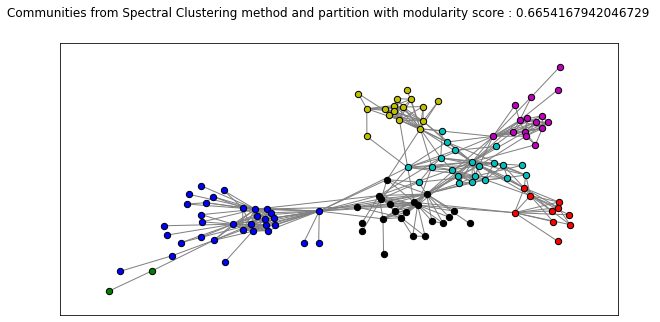

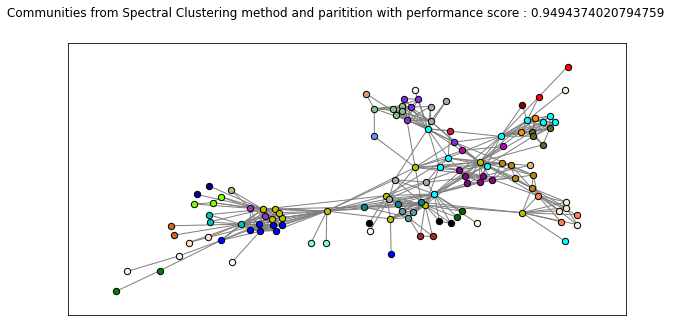

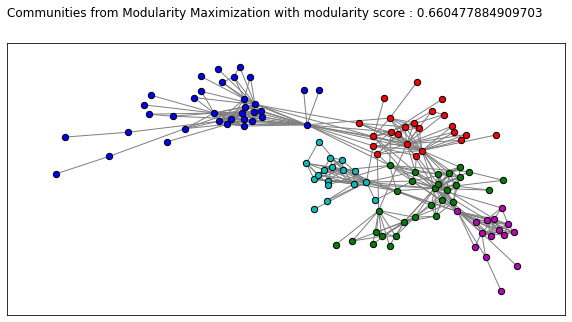

In [27]:
init_visual(got)

Visually we observe that the first and the third method give the best result since the resulting communities are more balanced than those resulting from the spectral one.

#### Visualization of email-Eu-core communities (to visualize the ground-truth partition)

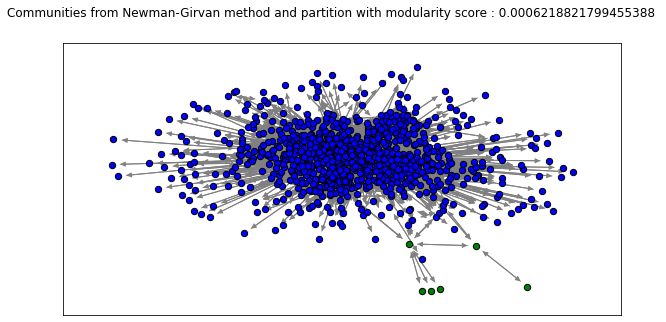

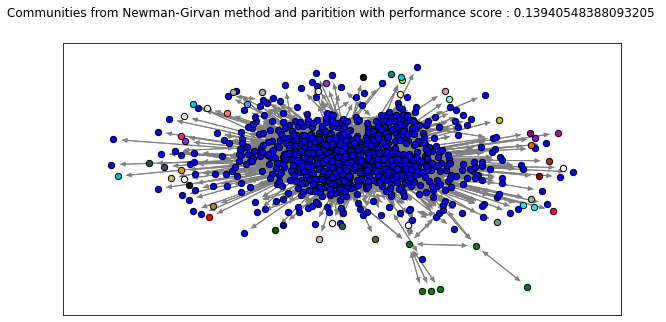

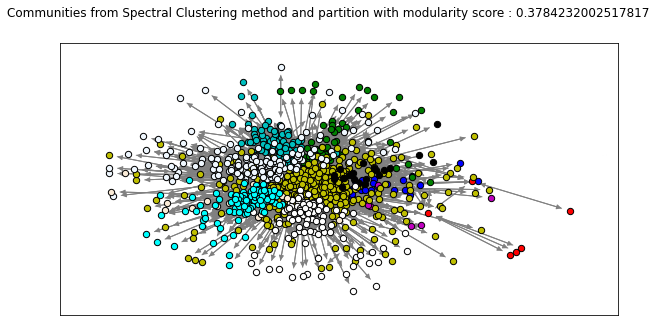

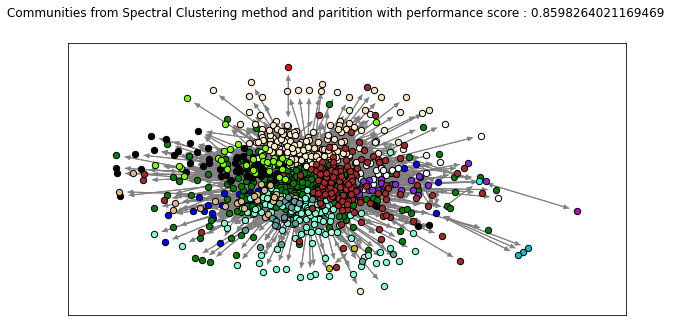

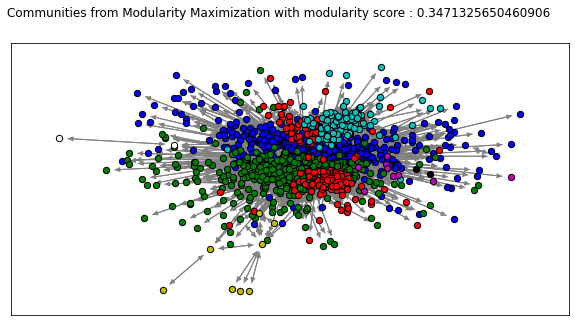

In [28]:
init_visual(eu_lar)

Visually we observe that the 2nd and 3rd methods have much better performance than the 1st.

#### Visualization of REG communities

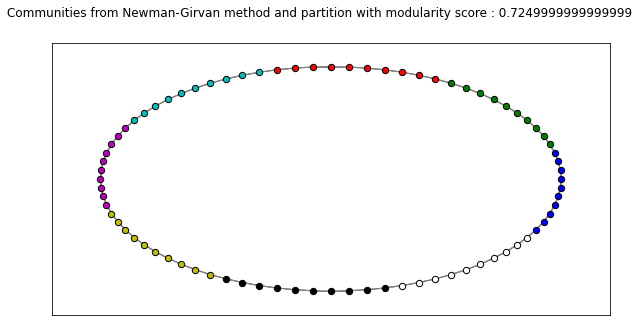

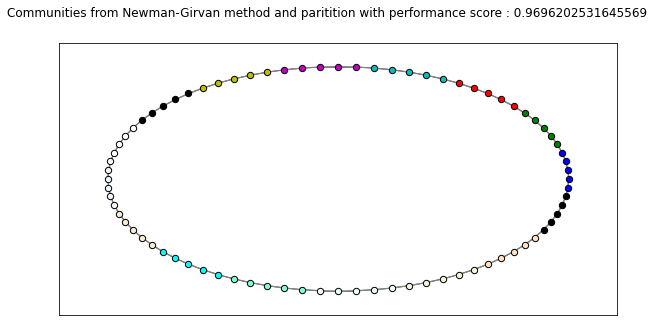

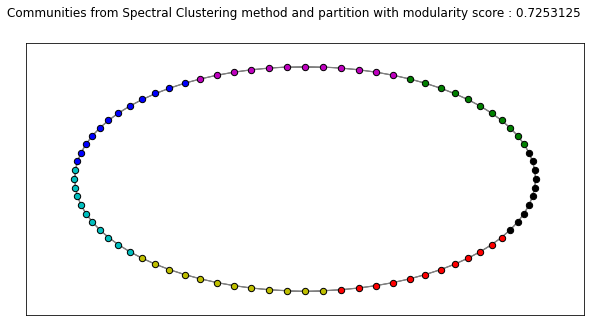

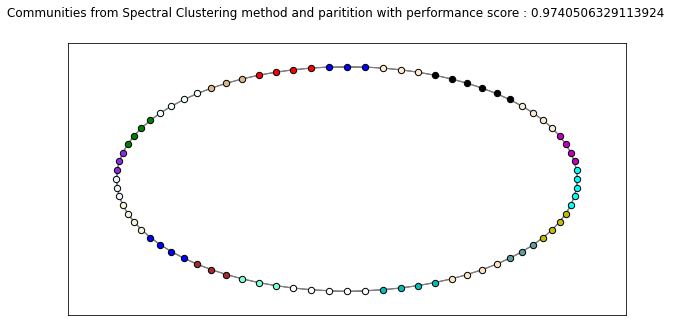

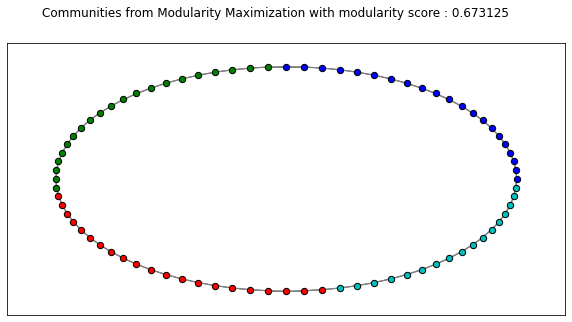

In [29]:
init_visual(REG)

We observe that for REG the separation of communities gives the best performance, which is explained by the fixed layout and geography of its graph. It is worth noting that the third method gives a slightly worse performance than the other two, due to the creation of the bottom-up tree diagram. From the graph above it is easy to see that the graph is divided into isometric regions. In general the number of communities is quite small.

#### Visualization of RGER communities

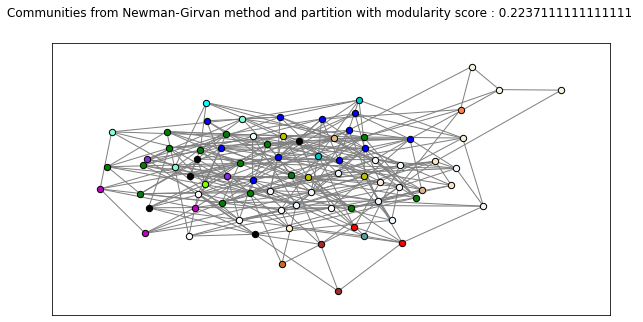

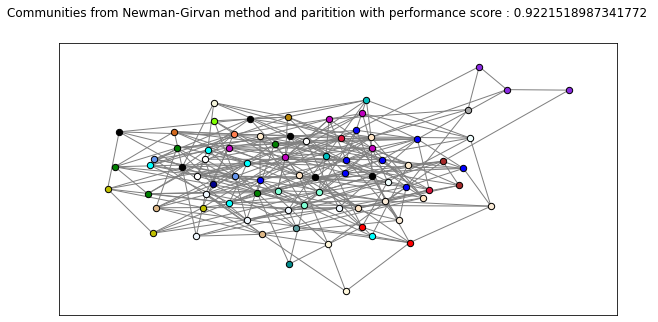

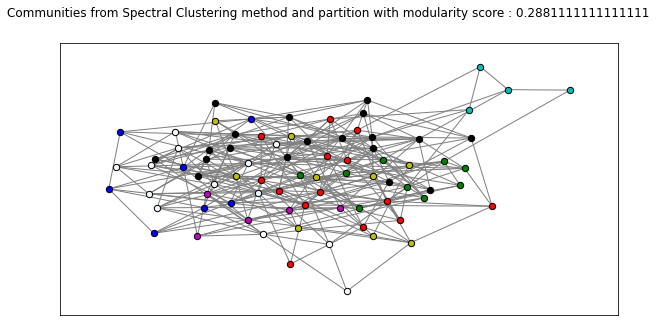

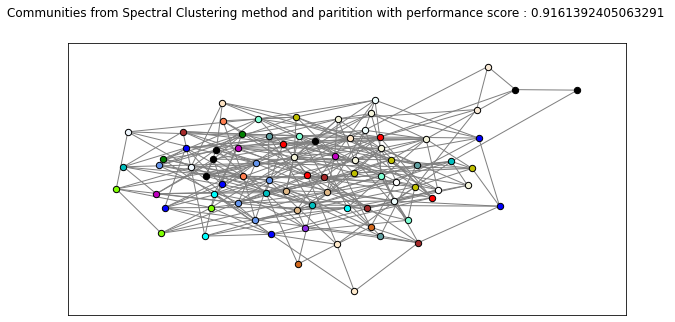

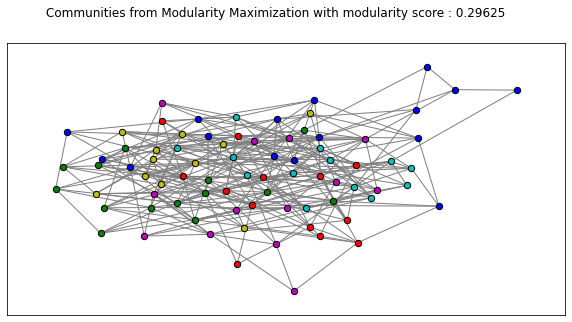

In [30]:
init_visual(RGER)

From this graph it is difficult to draw a clear conclusion. The number of edges is too large to distinguish the different areas. Nevertheless we observe the very large number of communities for the NG method, a fact characteristic only in this graph. We observe that in RGER, none of the three methods gives good performance. More specifically, all three methods are very frustrating and do not allow for effective segregation in communities. This is because the connections of the nodes are made in a random way, resulting in a very small chance of finding (distinct) communities in this topology. However, it is worth noting that the greedy method visually exhibits some resilience, due to the way it is constructed considering node-node, as it gives several communities, some of which are distinct.

#### Visualization of RGG communities

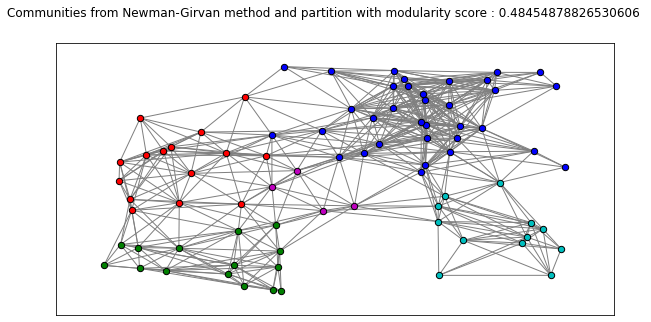

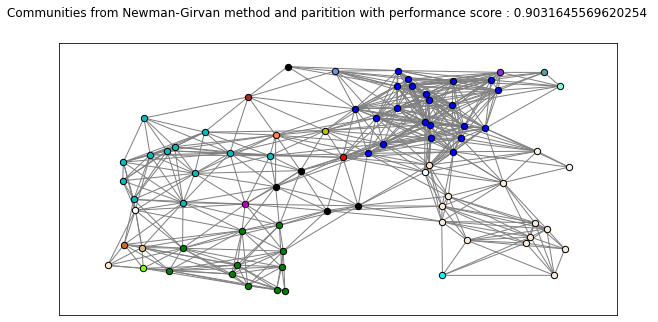

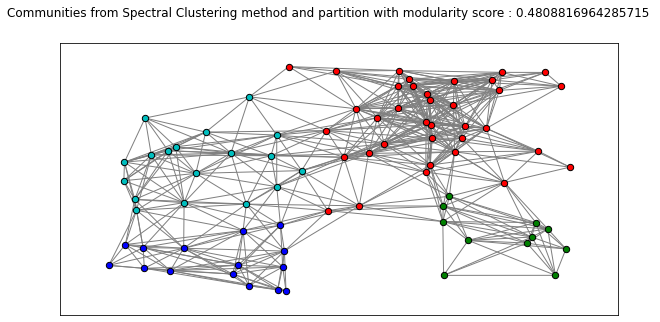

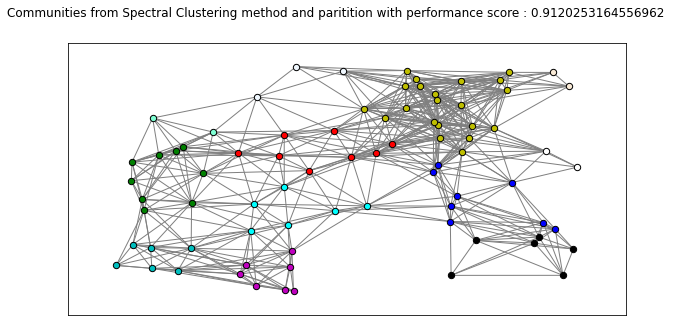

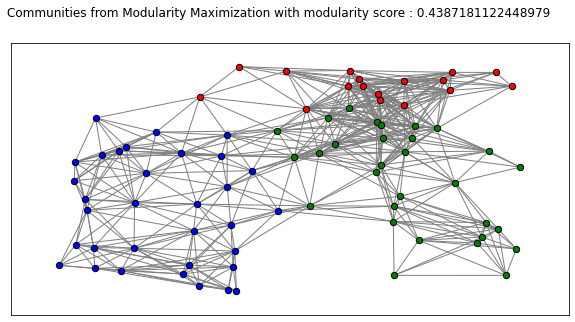

In [31]:
init_visual(RGG)

Communities are created around a graph that are geographically close to each other and are generally few in number. We notice that the performance is very good. Especially the first and the third method, both quantitatively and visually, give quite good and similar performance. The second method, however, which gives lower modularity than the other two, qualitatively does not seem to be quite effective, as it actually creates local aggregations from nodes of different communities, which is not the case with the other two methods, in which communities are locally quite dense from the nodes that make them up.

#### Visualization of SW communities

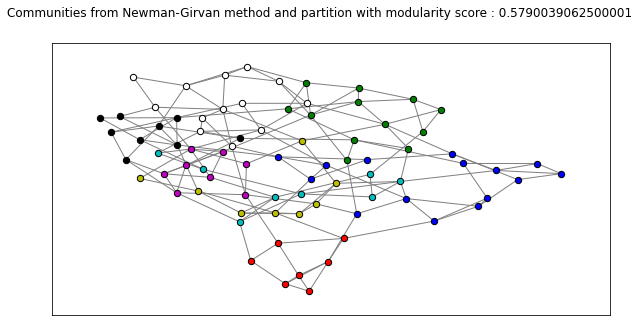

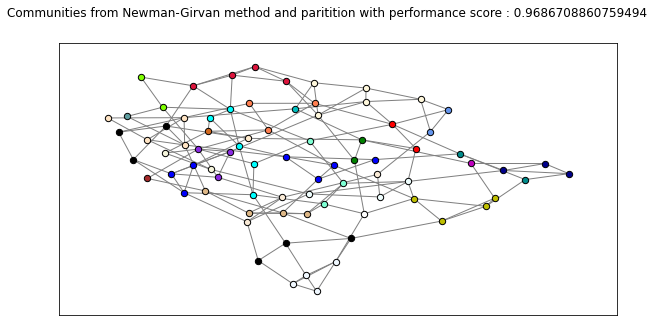

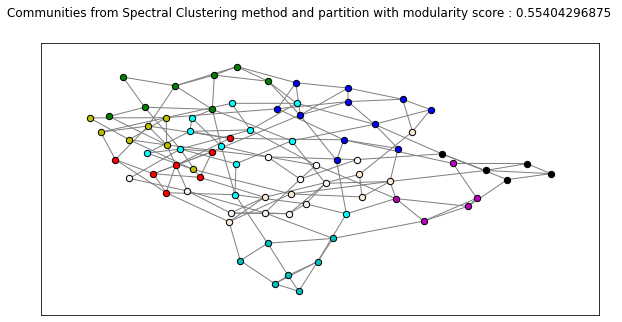

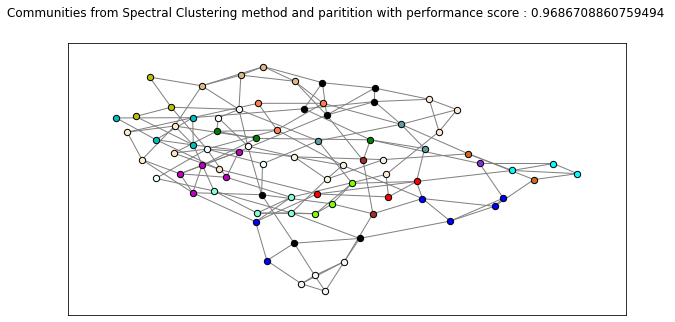

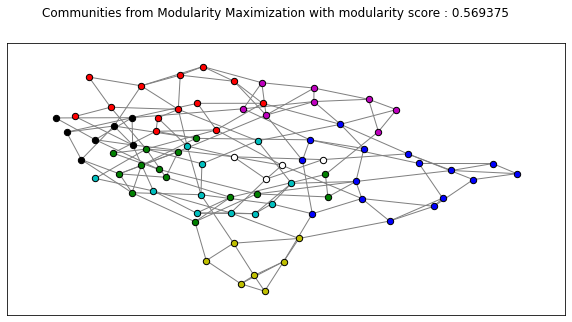

In [32]:
init_visual(SW)

In SW, communities are created as we expected, with interconnected nodes belonging to one community and the number of communities is almost the same between algorithms

#### Visualization of SF communities

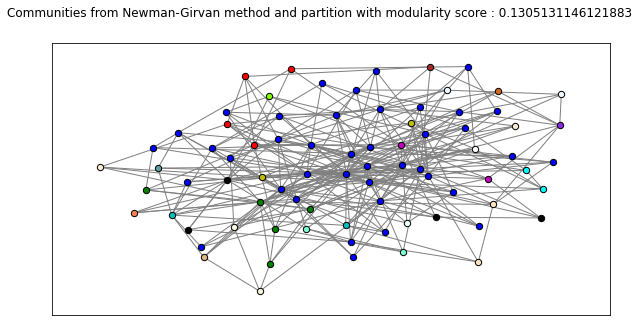

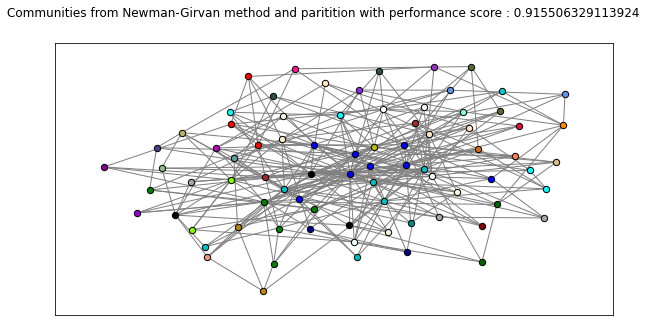

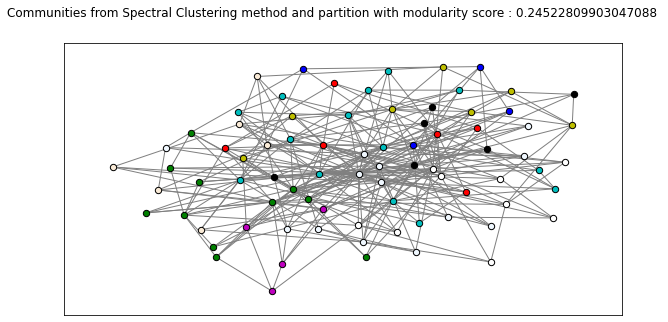

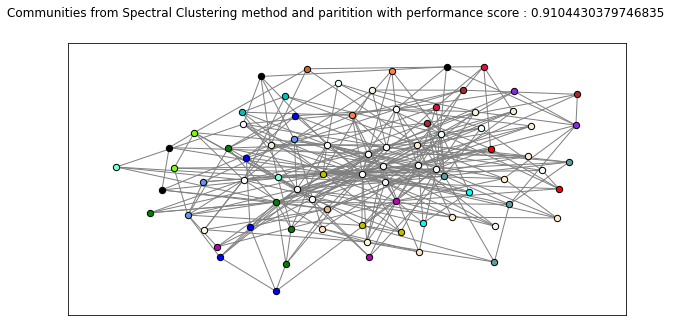

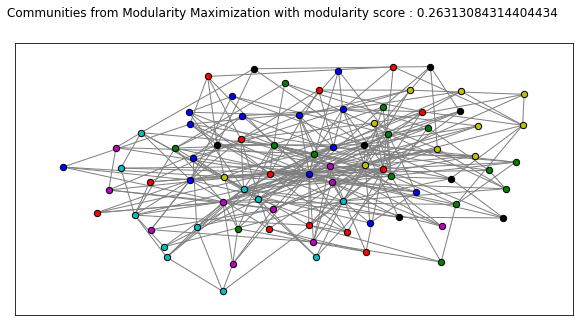

In [33]:
init_visual(SF)

Characteristic is the large number of communities. We see that there is a community that includes all the graphs to a great extent. And here there is a big difference between the multitude of communities between the methods. In a scale-free network we would expect communities to be around large nodes, as in the case of the small-world. On the other hand, we observe that the performance of the three methods is relatively low, showing small values ​​of modularity.